## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization, Activation
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], pre_activate=False):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   name="hidden_layer"+str(i+1))(input_layer)
            if pre_activate:
                x = BatchNormalization()(x)
                x = Activation("relu")(x)
            else:
                x = Activation("relu")(x)
                x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   name="hidden_layer"+str(i+1))(x)
            if pre_activate:
                x = BatchNormalization()(x)
                x = Activation("relu")(x)
            else:
                x = Activation("relu")(x)
                x = BatchNormalization()(x)
                
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256]
PRE_ACTIVATE = [True, False]
MOMENTUM = 0.95

In [7]:
results = {}
for i, (use_preact, bz) in enumerate(itertools.product(PRE_ACTIVATE, BATCH_SIZE)):
    print("Numbers of exp: %i, use_preact: %s, batch_size: %i" % (i, use_preact, bz))
    model = build_mlp(input_shape=x_train.shape[1:], pre_activate=use_preact)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=bz, 
              validation_data=(x_test, y_test), 
              verbose=1,
              shuffle=True)
    
    # Collect results
    exp_name_tag = (f"Pre_activation: {use_preact}, batch_size: {bz}")
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["accuracy"],
                             'valid-acc': model.history.history["val_accuracy"]}

Numbers of exp: 0, use_preact: True, batch_size: 2
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
act

3125/3125 [==============================] - 19s 6ms/step - loss: 0.5929 - accuracy: 0.7892 - val_loss: 1.9196 - val_accuracy: 0.5055
Epoch 37/50
3125/3125 [==============================] - 18s 6ms/step - loss: 0.5819 - accuracy: 0.7916 - val_loss: 1.7858 - val_accuracy: 0.5296
Epoch 38/50
3125/3125 [==============================] - 18s 6ms/step - loss: 0.5649 - accuracy: 0.7996 - val_loss: 1.8466 - val_accuracy: 0.5182
Epoch 39/50
3125/3125 [==============================] - 18s 6ms/step - loss: 0.5626 - accuracy: 0.8000 - val_loss: 1.9061 - val_accuracy: 0.5212
Epoch 40/50
3125/3125 [==============================] - 18s 6ms/step - loss: 0.5502 - accuracy: 0.8041 - val_loss: 1.7108 - val_accuracy: 0.5432
Epoch 41/50
3125/3125 [==============================] - 18s 6ms/step - loss: 0.5431 - accuracy: 0.8071 - val_loss: 1.9642 - val_accuracy: 0.5200
Epoch 42/50
3125/3125 [==============================] - 18s 6ms/step - loss: 0.5356 - accuracy: 0.8100 - val_loss: 2.0680 - val_accurac

Epoch 23/50
391/391 [==============================] - 4s 9ms/step - loss: 0.2266 - accuracy: 0.9201 - val_loss: 2.9908 - val_accuracy: 0.4652
Epoch 24/50
391/391 [==============================] - 4s 9ms/step - loss: 0.2145 - accuracy: 0.9236 - val_loss: 3.0950 - val_accuracy: 0.4578
Epoch 25/50
391/391 [==============================] - 4s 9ms/step - loss: 0.2000 - accuracy: 0.9288 - val_loss: 2.9973 - val_accuracy: 0.4437
Epoch 26/50
391/391 [==============================] - 4s 9ms/step - loss: 0.1990 - accuracy: 0.9306 - val_loss: 2.7924 - val_accuracy: 0.4607
Epoch 27/50
391/391 [==============================] - 4s 9ms/step - loss: 0.1881 - accuracy: 0.9338 - val_loss: 3.6508 - val_accuracy: 0.4372
Epoch 28/50
391/391 [==============================] - 4s 9ms/step - loss: 0.1699 - accuracy: 0.9398 - val_loss: 3.0428 - val_accuracy: 0.4769
Epoch 29/50
391/391 [==============================] - 4s 9ms/step - loss: 0.1590 - accuracy: 0.9437 - val_loss: 2.8536 - val_accuracy: 0.4740

25000/25000 [==============================] - 136s 5ms/step - loss: 2.2016 - accuracy: 0.1892 - val_loss: 118.6588 - val_accuracy: 0.2071
Epoch 11/50
25000/25000 [==============================] - 136s 5ms/step - loss: 2.2025 - accuracy: 0.1859 - val_loss: 206.8385 - val_accuracy: 0.2333
Epoch 12/50
25000/25000 [==============================] - 136s 5ms/step - loss: 2.2005 - accuracy: 0.1902 - val_loss: 65.5778 - val_accuracy: 0.1960
Epoch 13/50
25000/25000 [==============================] - 136s 5ms/step - loss: 2.2009 - accuracy: 0.1862 - val_loss: 132.2641 - val_accuracy: 0.2237
Epoch 14/50
25000/25000 [==============================] - 136s 5ms/step - loss: 2.2034 - accuracy: 0.1883 - val_loss: 449.1072 - val_accuracy: 0.2582
Epoch 15/50
25000/25000 [==============================] - 136s 5ms/step - loss: 2.2027 - accuracy: 0.1863 - val_loss: 103.7027 - val_accuracy: 0.2368
Epoch 16/50
25000/25000 [==============================] - 135s 5ms/step - loss: 2.2027 - accuracy: 0.1846 

3125/3125 [==============================] - 18s 6ms/step - loss: 1.6661 - accuracy: 0.4085 - val_loss: 1.7848 - val_accuracy: 0.3809
Epoch 3/50
3125/3125 [==============================] - 17s 5ms/step - loss: 1.5923 - accuracy: 0.4321 - val_loss: 1.5855 - val_accuracy: 0.4428
Epoch 4/50
3125/3125 [==============================] - 17s 5ms/step - loss: 1.5497 - accuracy: 0.4484 - val_loss: 1.5843 - val_accuracy: 0.4423
Epoch 5/50
3125/3125 [==============================] - 17s 5ms/step - loss: 1.5118 - accuracy: 0.4629 - val_loss: 1.6414 - val_accuracy: 0.4204
Epoch 6/50
3125/3125 [==============================] - 17s 5ms/step - loss: 1.4831 - accuracy: 0.4730 - val_loss: 1.4744 - val_accuracy: 0.4751
Epoch 7/50
3125/3125 [==============================] - 17s 5ms/step - loss: 1.4508 - accuracy: 0.4855 - val_loss: 1.4897 - val_accuracy: 0.4691
Epoch 8/50
3125/3125 [==============================] - 17s 5ms/step - loss: 1.4291 - accuracy: 0.4908 - val_loss: 1.5660 - val_accuracy: 0.4

Epoch 1/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.7565 - accuracy: 0.3737 - val_loss: 1.8445 - val_accuracy: 0.3279
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5933 - accuracy: 0.4320 - val_loss: 1.6077 - val_accuracy: 0.4326
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5115 - accuracy: 0.4603 - val_loss: 1.5111 - val_accuracy: 0.4668
Epoch 4/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4481 - accuracy: 0.4841 - val_loss: 1.5062 - val_accuracy: 0.4650
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4056 - accuracy: 0.4974 - val_loss: 1.4807 - val_accuracy: 0.4760
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3649 - accuracy: 0.5124 - val_loss: 1.3865 - val_accuracy: 0.5091
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3253 - accuracy: 0.5294 - val_loss: 1.5016 - val_accuracy

Epoch 1/50
391/391 [==============================] - 4s 10ms/step - loss: 1.6967 - accuracy: 0.3989 - val_loss: 1.9635 - val_accuracy: 0.3322
Epoch 2/50
391/391 [==============================] - 4s 10ms/step - loss: 1.4950 - accuracy: 0.4679 - val_loss: 1.8034 - val_accuracy: 0.3819
Epoch 3/50
391/391 [==============================] - 4s 10ms/step - loss: 1.4043 - accuracy: 0.4995 - val_loss: 1.8548 - val_accuracy: 0.3510
Epoch 4/50
391/391 [==============================] - 4s 10ms/step - loss: 1.3479 - accuracy: 0.5171 - val_loss: 1.7182 - val_accuracy: 0.3951
Epoch 5/50
391/391 [==============================] - 4s 10ms/step - loss: 1.2912 - accuracy: 0.5399 - val_loss: 1.7344 - val_accuracy: 0.3981
Epoch 6/50
391/391 [==============================] - 4s 10ms/step - loss: 1.2437 - accuracy: 0.5579 - val_loss: 1.6533 - val_accuracy: 0.4336
Epoch 7/50
391/391 [==============================] - 4s 10ms/step - loss: 1.2060 - accuracy: 0.5704 - val_loss: 1.5356 - val_accuracy: 0.4768

Epoch 1/50
196/196 [==============================] - 3s 14ms/step - loss: 1.6941 - accuracy: 0.4012 - val_loss: 1.8118 - val_accuracy: 0.3571
Epoch 2/50
196/196 [==============================] - 3s 13ms/step - loss: 1.4716 - accuracy: 0.4798 - val_loss: 1.7271 - val_accuracy: 0.3945
Epoch 3/50
196/196 [==============================] - 3s 13ms/step - loss: 1.3823 - accuracy: 0.5073 - val_loss: 1.7354 - val_accuracy: 0.4012
Epoch 4/50
196/196 [==============================] - 3s 13ms/step - loss: 1.3152 - accuracy: 0.5343 - val_loss: 1.8253 - val_accuracy: 0.3733
Epoch 5/50
196/196 [==============================] - 3s 13ms/step - loss: 1.2533 - accuracy: 0.5576 - val_loss: 1.7294 - val_accuracy: 0.3965
Epoch 6/50
196/196 [==============================] - 3s 13ms/step - loss: 1.2063 - accuracy: 0.5737 - val_loss: 1.5919 - val_accuracy: 0.4442
Epoch 7/50
196/196 [==============================] - 3s 13ms/step - loss: 1.1599 - accuracy: 0.5864 - val_loss: 1.6530 - val_accuracy: 0.4316

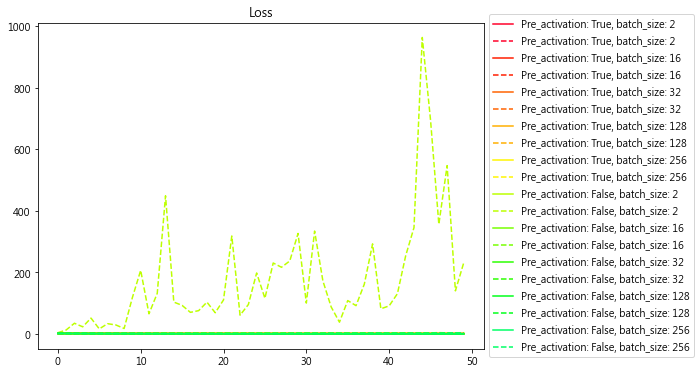

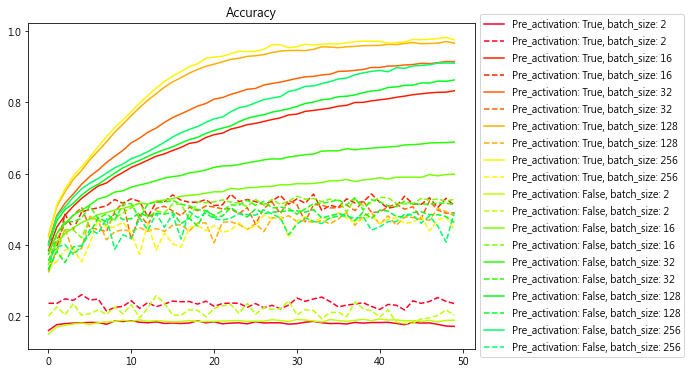

In [8]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = 20

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()